# Regularization
- not have too big numbers in the weights
- l2reg = lambda * tf.reduce_sum(tf.square(W))

# Dropout_(A simple way to prevent Neural Networks from overfitting(srivastava et al.2014)
- randomly set some neurons to zero in the forward pass
    - 몇 개의 뉴런을 쉬게하면서 학습을 시키는 방법
    - 학습시에만 dropout을 사용하고 평가에서는 모두 반영
dropout_rate = tf.placeholder("float")
_ L1 = tf.nn.relu(tf.add(tf.matmul(X,W1), B1))
L1 = tf.nn.dropout(_L1, dropout_rate)

TRAIN
sess.run(optimizer, feed_dict={X: batch_sx, Y: batch_ys, dropout_rate:0.7})

Evaluation
print "Accuracy", accuracy.eval({X : mnist.test.images, Y: mnis.test.labels, dropout_rate:1})

# Ensemble
- 최소 2%에서 4%까지 성능 향상 가능
k개의 training set
k개의 learning model
-> combiner
-> Ensemble prediction

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(207)

C:\Users\MJ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(207)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [7]:
X = tf.placeholder(tf.float32, [None, 784]) # 28*28
Y = tf.placeholder(tf.float32, [None, 10]) # 0~9 labels

In [13]:
W1 = tf.Variable(tf.random_normal([784, 40]))
b1 = tf.Variable(tf.random_normal([40]))
layer1 = tf.nn.relu(tf.matmul(X, W1)+b1)

In [14]:
W2 = tf.Variable(tf.random_normal([40,40]))
b2 = tf.Variable(tf.random_normal([40]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2)+b2)

In [15]:
W3 = tf.Variable(tf.random_normal([40, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(layer2, W3)+b3

In [17]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [18]:
sess = tf.Session()

In [19]:
sess.run(tf.global_variables_initializer())

In [24]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict={X:batch_xs, Y:batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print("Epoch:", '%04d' % (epoch+1), "cost:" '{:.9f}'.format(avg_cost))
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 cost:0.435595154
Epoch: 0002 cost:0.401134716
Epoch: 0003 cost:0.369300571
Epoch: 0004 cost:0.346401569
Epoch: 0005 cost:0.320404975
Epoch: 0006 cost:0.302848966
Epoch: 0007 cost:0.284539592
Epoch: 0008 cost:0.269890244
Epoch: 0009 cost:0.258584269
Epoch: 0010 cost:0.242553198
Epoch: 0011 cost:0.232663804
Epoch: 0012 cost:0.220743794
Epoch: 0013 cost:0.213381615
Epoch: 0014 cost:0.205783175
Epoch: 0015 cost:0.194204386
Accuracy: 0.9256


# Xavier for MNIST _ xavier_initializer() error

In [1]:
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

C:\Users\MJ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(207)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [5]:
W1 = tf.get_variable("W1", shape=[784, 40],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([40]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

In [6]:
W2 = tf.get_variable("W2", shape=[40, 40],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([40]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

In [7]:
W3 = tf.get_variable("W3", shape=[40, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 cost = 0.524369986
Epoch: 0002 cost = 0.223447762
Epoch: 0003 cost = 0.171799052
Epoch: 0004 cost = 0.142318009
Epoch: 0005 cost = 0.124639683
Epoch: 0006 cost = 0.110633826
Epoch: 0007 cost = 0.098530316
Epoch: 0008 cost = 0.089972481
Epoch: 0009 cost = 0.082975691
Epoch: 0010 cost = 0.076035280
Epoch: 0011 cost = 0.071192422
Epoch: 0012 cost = 0.065978330
Epoch: 0013 cost = 0.060362315
Epoch: 0014 cost = 0.057098200
Epoch: 0015 cost = 0.053069679
Learning Finished!
Accuracy: 0.9711


# Deep NN for MNIST

In [28]:
tf.reset_default_graph()

In [29]:
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(207)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [30]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [31]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [32]:
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

In [33]:
W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

In [34]:
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

In [35]:
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

In [36]:
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [37]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

In [40]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [41]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 cost = 0.297470367
Epoch: 0002 cost = 0.104144256
Epoch: 0003 cost = 0.072417568
Epoch: 0004 cost = 0.055276445
Epoch: 0005 cost = 0.042537954
Epoch: 0006 cost = 0.034423834
Epoch: 0007 cost = 0.029271897
Epoch: 0008 cost = 0.027851441
Epoch: 0009 cost = 0.020814724
Epoch: 0010 cost = 0.022909323
Epoch: 0011 cost = 0.020344504
Epoch: 0012 cost = 0.015339866
Epoch: 0013 cost = 0.016382083
Epoch: 0014 cost = 0.015228625
Epoch: 0015 cost = 0.013409629
Learning Finished!
Accuracy: 0.9794


# Dropout for MNIST

In [42]:
tf.reset_default_graph()

In [43]:
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(207)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [45]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [46]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [44]:
keep_prob = tf.placeholder(tf.float32)

In [47]:
W1 = tf.get_variable("W1", shape=[28*28, 512])
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1)+b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

In [48]:
W2 = tf.get_variable("W2", shape=[512,512])
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2)+b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [54]:
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

In [55]:
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [56]:
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [57]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [58]:
sess = tf.Session()

In [59]:
sess.run(tf.global_variables_initializer())

In [63]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))


Epoch: 0001 cost = 0.470627630
Epoch: 0002 cost = 0.174592587
Epoch: 0003 cost = 0.132866179
Epoch: 0004 cost = 0.110626928
Epoch: 0005 cost = 0.095350391
Epoch: 0006 cost = 0.086115099
Epoch: 0007 cost = 0.074690788
Epoch: 0008 cost = 0.070555662
Epoch: 0009 cost = 0.064569457
Epoch: 0010 cost = 0.057399513
Epoch: 0011 cost = 0.057509737
Epoch: 0012 cost = 0.053123095
Epoch: 0013 cost = 0.050389207
Epoch: 0014 cost = 0.046079592
Epoch: 0015 cost = 0.047189916
Learning Finished!
Accuracy: 0.9816


# Optimizers
- tf.train.AdadeltaOptimizer
- tf.train.AdagradOptimizer
- tf.train.AdagradDAOptimizer
- tf.train.MomentumOptimizer
- tf.train.AdamOptimizer
    - 일반적으로 optimizer를 Adam으로 사용함


- tf.train.FtrlOptimizer
- tf.train.ProximalGradientDescentOptimizer
- tf.train.ProximalAdagradOptimizer
- tf.train.RMSPropOptimizer

# Batch Normalization

In [64]:
# Load Library
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [65]:
mnist.train.images.shape

(55000, 784)

In [66]:
mnist.test.images.shape

(10000, 784)

In [68]:
mnist.train.labels.shape

(55000, 10)

In [69]:
mnist.test.labels.shape

(10000, 10)

In [70]:
# Define Model & Solver class

In [71]:
class Model:
    """Network Model Class
    
    Note that this class has only the constructor.
    The actual model is defined inside the constructor.
    
    Attributes
    ----------
    X : tf.float32
        This is a tensorflow placeholder for MNIST images
        Expected shape is [None, 784]
        
    y : tf.float32
        This is a tensorflow placeholder for MNIST labels (one hot encoded)
        Expected shape is [None, 10]
        
    mode : tf.bool
        This is used for the batch normalization
        It's `True` at training time and `False` at test time
        
    loss : tf.float32
        The loss function is a softmax cross entropy
        
    train_op
        This is simply the training op that minimizes the loss
        
    accuracy : tf.float32
        The accuracy operation
        
    
    Examples
    ----------
    >>> model = Model("Batch Norm", 32, 10)

    """
    def __init__(self, name, input_dim, output_dim, hidden_dims=[32, 32], use_batchnorm=True, activation_fn=tf.nn.relu, optimizer=tf.train.AdamOptimizer, lr=0.01):
        """ Constructor
        
        Parameters
        --------
        name : str
            The name of this network
            The entire network will be created under `tf.variable_scope(name)`
            
        input_dim : int
            The input dimension
            In this example, 784
        
        output_dim : int
            The number of output labels
            There are 10 labels
            
        hidden_dims : list (default: [32, 32])
            len(hidden_dims) = number of layers
            each element is the number of hidden units
            
        use_batchnorm : bool (default: True)
            If true, it will create the batchnormalization layer
            
        activation_fn : TF functions (default: tf.nn.relu)
            Activation Function
            
        optimizer : TF optimizer (default: tf.train.AdamOptimizer)
            Optimizer Function
            
        lr : float (default: 0.01)
            Learning rate
        
        """
        with tf.variable_scope(name):
            # Placeholders are defined
            self.X = tf.placeholder(tf.float32, [None, input_dim], name='X')
            self.y = tf.placeholder(tf.float32, [None, output_dim], name='y')
            self.mode = tf.placeholder(tf.bool, name='train_mode')            
            
            # Loop over hidden layers
            net = self.X
            for i, h_dim in enumerate(hidden_dims):
                with tf.variable_scope('layer{}'.format(i)):
                    net = tf.layers.dense(net, h_dim)
                    
                    if use_batchnorm:
                        net = tf.layers.batch_normalization(net, training=self.mode)
                        
                    net = activation_fn(net)
            
            # Attach fully connected layers
            net = tf.contrib.layers.flatten(net)
            net = tf.layers.dense(net, output_dim)
            
            self.loss = tf.nn.softmax_cross_entropy_with_logits(logits=net, labels=self.y)
            self.loss = tf.reduce_mean(self.loss, name='loss')    
            
            # When using the batchnormalization layers,
            # it is necessary to manually add the update operations
            # because the moving averages are not included in the graph            
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=name)
            with tf.control_dependencies(update_ops):                     
                self.train_op = optimizer(lr).minimize(self.loss)
            
            # Accuracy etc 
            softmax = tf.nn.softmax(net, name='softmax')
            self.accuracy = tf.equal(tf.argmax(softmax, 1), tf.argmax(self.y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(self.accuracy, tf.float32))

In [72]:
class Solver:
    """Solver class
    
    This class will contain the model class and session
    
    Attributes
    ----------
    model : Model class
    sess : TF session
        
    Methods
    ----------
    train(X, y)
        Run the train_op and Returns the loss
        
    evalulate(X, y, batch_size=None)
        Returns "Loss" and "Accuracy"
        If batch_size is given, it's computed using batch_size
        because most GPU memories cannot handle the entire training data at once
            
    Example
    ----------
    >>> sess = tf.InteractiveSession()
    >>> model = Model("BatchNorm", 32, 10)
    >>> solver = Solver(sess, model)
    
    # Train
    >>> solver.train(X, y)
    
    # Evaluate
    >>> solver.evaluate(X, y)
    """
    def __init__(self, sess, model):
        self.model = model
        self.sess = sess
        
    def train(self, X, y):
        feed = {
            self.model.X: X,
            self.model.y: y,
            self.model.mode: True
        }
        train_op = self.model.train_op
        loss = self.model.loss
        
        return self.sess.run([train_op, loss], feed_dict=feed)
    
    def evaluate(self, X, y, batch_size=None):
        if batch_size:
            N = X.shape[0]
            
            total_loss = 0
            total_acc = 0
            
            for i in range(0, N, batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                
                feed = {
                    self.model.X: X_batch,
                    self.model.y: y_batch,
                    self.model.mode: False
                }
                
                loss = self.model.loss
                accuracy = self.model.accuracy
                
                step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed)
                
                total_loss += step_loss * X_batch.shape[0]
                total_acc += step_acc * X_batch.shape[0]
            
            total_loss /= N
            total_acc /= N
            
            return total_loss, total_acc
            
            
        else:
            feed = {
                self.model.X: X,
                self.model.y: y,
                self.model.mode: False
            }
            
            loss = self.model.loss            
            accuracy = self.model.accuracy

            return self.sess.run([loss, accuracy], feed_dict=feed)

In [73]:
# instantiate Model & Solver classes

In [74]:

input_dim = 784
output_dim = 10
N = 55000

tf.reset_default_graph()
sess = tf.InteractiveSession()

# We create two models: one with the batch norm and other without
bn = Model('batchnorm', input_dim, output_dim, use_batchnorm=True)
nn = Model('no_norm', input_dim, output_dim, use_batchnorm=False)

# We create two solvers: to train both models at the same time for comparison
# Usually we only need one solver class
bn_solver = Solver(sess, bn)
nn_solver = Solver(sess, nn)

In [75]:
epoch_n = 10
batch_size = 32

# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

In [76]:
# run the train step

In [77]:
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epoch_n):
    for _ in range(N//batch_size):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        
        _, bn_loss = bn_solver.train(X_batch, y_batch)
        _, nn_loss = nn_solver.train(X_batch, y_batch)       
    
    b_loss, b_acc = bn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    n_loss, n_acc = nn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    
    # Save train losses/acc
    train_losses.append([b_loss, n_loss])
    train_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-TRAIN] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    
    b_loss, b_acc = bn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    n_loss, n_acc = nn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    
    # Save valid losses/acc
    valid_losses.append([b_loss, n_loss])
    valid_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-VALID] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    print()

[Epoch 0-TRAIN] Batchnorm Loss(Acc): 0.14393(95.65%) vs No Batchnorm Loss(Acc): 0.19346(94.21%)
[Epoch 0-VALID] Batchnorm Loss(Acc): 0.15312(95.84%) vs No Batchnorm Loss(Acc): 0.20715(94.56%)

[Epoch 1-TRAIN] Batchnorm Loss(Acc): 0.10915(96.53%) vs No Batchnorm Loss(Acc): 0.16416(95.16%)
[Epoch 1-VALID] Batchnorm Loss(Acc): 0.13034(96.50%) vs No Batchnorm Loss(Acc): 0.17924(94.90%)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): 0.09946(96.91%) vs No Batchnorm Loss(Acc): 0.15860(95.27%)
[Epoch 2-VALID] Batchnorm Loss(Acc): 0.12249(96.56%) vs No Batchnorm Loss(Acc): 0.19252(94.30%)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): 0.07892(97.54%) vs No Batchnorm Loss(Acc): 0.14927(95.67%)
[Epoch 3-VALID] Batchnorm Loss(Acc): 0.11039(96.88%) vs No Batchnorm Loss(Acc): 0.18369(95.02%)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): 0.06523(97.94%) vs No Batchnorm Loss(Acc): 0.16483(95.28%)
[Epoch 4-VALID] Batchnorm Loss(Acc): 0.09453(97.66%) vs No Batchnorm Loss(Acc): 0.19668(95.02%)

[Epoch 5-TRAIN] Batchnorm Loss(Acc)

In [78]:
# performance comparison

In [79]:
bn_solver.evaluate(mnist.test.images, mnist.test.labels)

[0.09700824, 0.9734]

In [80]:
nn_solver.evaluate(mnist.test.images, mnist.test.labels)

[0.2106352, 0.9588]

In [81]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]
    
    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)
        
    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

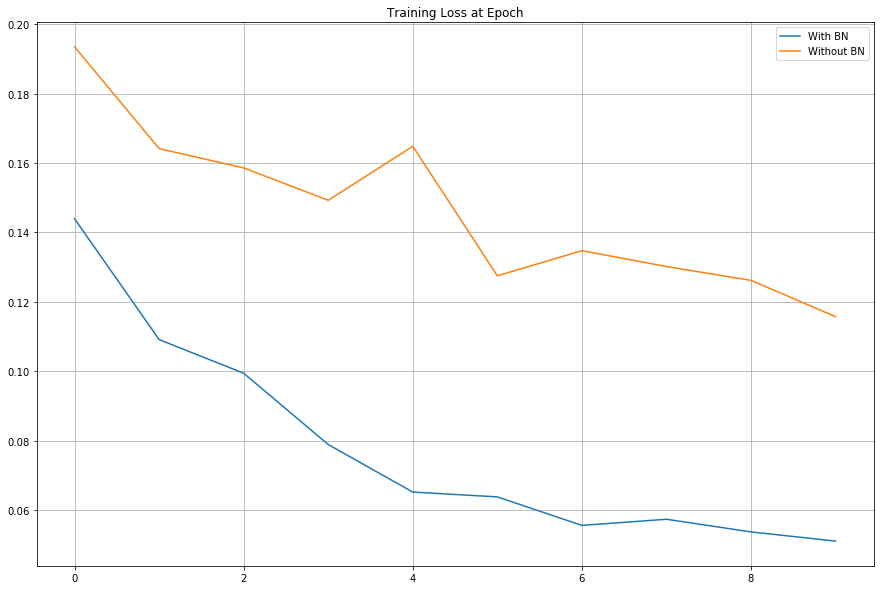

In [82]:
plot_compare(train_losses, title='Training Loss at Epoch')

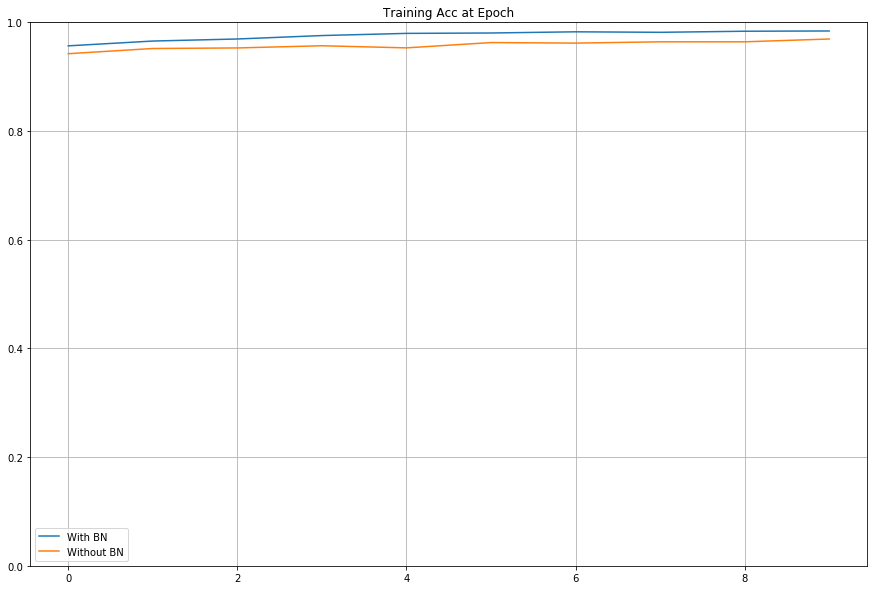

In [83]:
plot_compare(train_accs, [0, 1.0], title="Training Acc at Epoch")

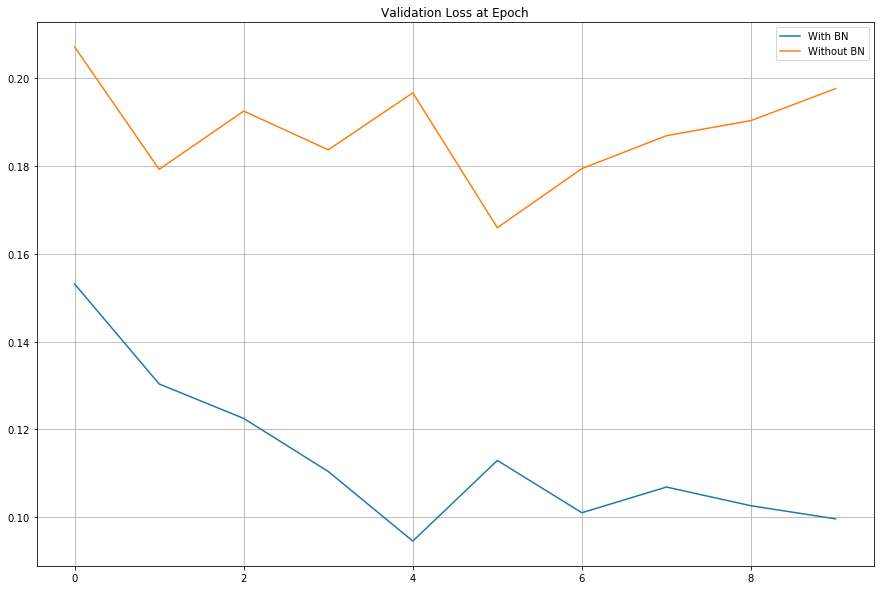

In [84]:
plot_compare(valid_losses, title='Validation Loss at Epoch')

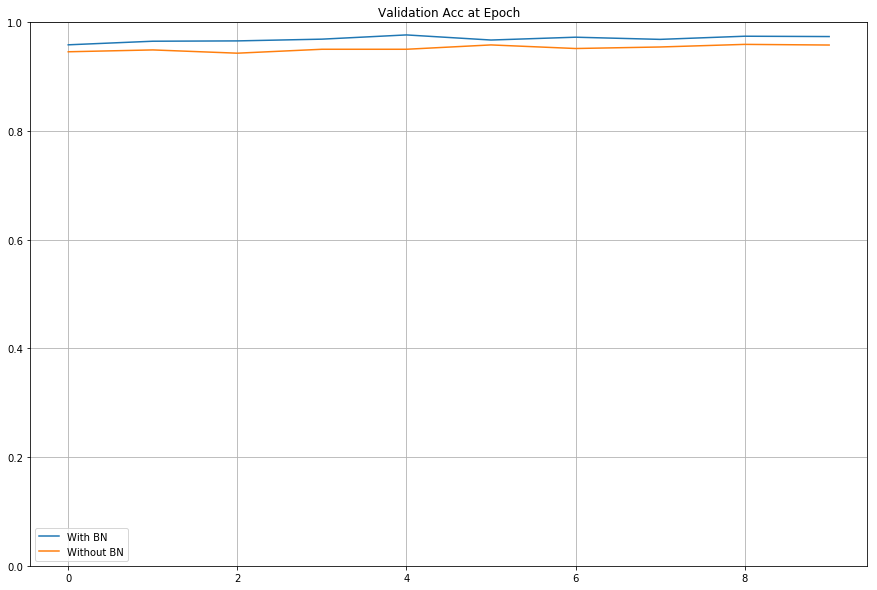

In [85]:
plot_compare(valid_accs, [0, 1.], title='Validation Acc at Epoch')